In [69]:
!pip install langgraph langsmith

In [70]:
!pip install langchain langchain_groq langchain_community

In [71]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('langsmith_api_key')
print(langsmith)

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


In [72]:
import os
os.environ["LANGHAIN_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACKING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggarph"

In [73]:
!pip install langchain-groq # Use a hyphen instead of underscore in the package name
from langchain_groq import ChatGroq # Now this import should work

In [74]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma-7b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7da25d1c5a80>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7da25d1c5300>, model_name='Gemma-7b-It', groq_api_key=SecretStr('**********'))

In [75]:
## Start Building ChatBot using Langgraph

In [76]:
!pip install langgraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [77]:
class State(TypedDict):
  messages:Annotated[list,add_messages]
graph_builder=StateGraph(State)

In [78]:
graph_builder

In [79]:
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [80]:
graph_builder.add_node("chatbot",chatbot)

In [81]:
graph_builder

In [82]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)


In [83]:
graph=graph_builder.compile()

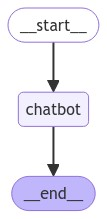

In [84]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)


User: hello
dict_values([{'messages': AIMessage(content="Hello! 👋 It's great to hear from you. How can I help you today? 😊", response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 10, 'total_tokens': 31, 'completion_time': 0.02335638, 'prompt_time': 0.007824404, 'queue_time': 0.0063767749999999995, 'total_time': 0.031180784}, 'model_name': 'Gemma-7b-It', 'system_fingerprint': 'fp_7d8efeb0b1', 'finish_reason': 'stop', 'logprobs': None}, id='run-1fd3b9d1-2108-48d7-b265-6478d0b530b5-0', usage_metadata={'input_tokens': 10, 'output_tokens': 21, 'total_tokens': 31})}])
content="Hello! 👋 It's great to hear from you. How can I help you today? 😊" response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 10, 'total_tokens': 31, 'completion_time': 0.02335638, 'prompt_time': 0.007824404, 'queue_time': 0.0063767749999999995, 'total_time': 0.031180784}, 'model_name': 'Gemma-7b-It', 'system_fingerprint': 'fp_7d8efeb0b1', 'finish_reason': 'stop', 'logprobs': No